In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This project is submitted to TECHNOHACKS

## importing the data

In [76]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [77]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
x = iris.data.features 
y = iris.data.targets 



# checking first rows# 

In [78]:
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# i found that all features are numerical but class feature so i will encode it using lable encoder

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y);

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# combine the features and target into one dataframe to see what correlation between features and target

In [81]:
df=pd.concat([x,pd.Series(encoded_y,name='class')],axis=1,)

<Axes: >

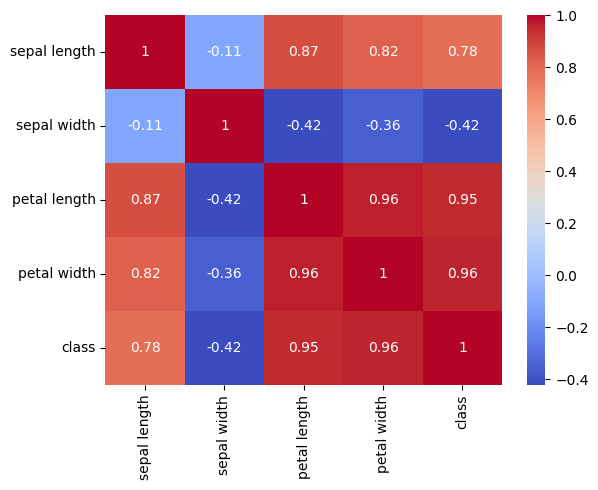

In [82]:
import seaborn as sns
corrmat=df.corr()
sns.heatmap(corrmat,annot=True,cmap='coolwarm')

## checking for outliers 

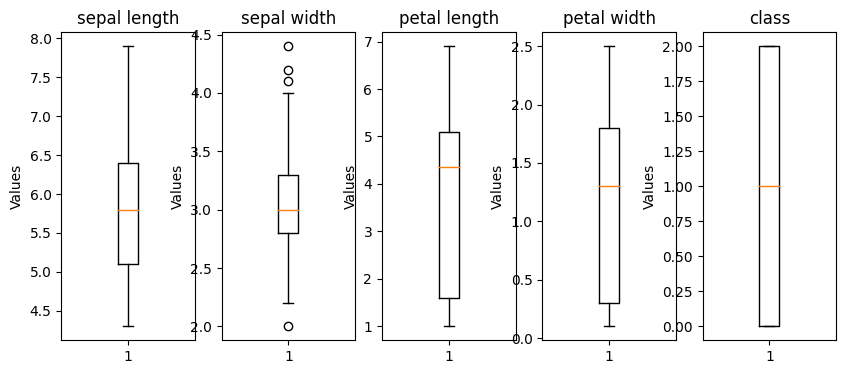

In [83]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(10, 4))
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')


## checking for nulls

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## drop outliers

In [85]:
ind=df[df['sepal width']>4].index
no_outliers_df=df.drop(ind)

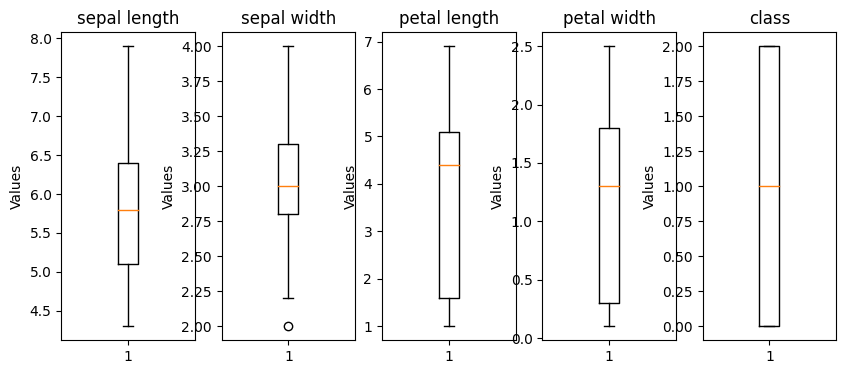

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(10, 4))
for i, column in enumerate(no_outliers_df.columns):
    axes[i].boxplot(no_outliers_df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

## spliting and scaling 

In [87]:
y=df.pop('class')
x=df

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

## fitting dtc because i have 3 classes

In [89]:
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [90]:
m=DecisionTreeClassifier()
m.fit(X_train,y_train)


DecisionTreeClassifier()

In [91]:
y_pred=m.predict(X_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

